In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy.stats import iqr, boxcox
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

ImportError: dateutil 2.5.0 is the minimum required version

In [ ]:
X = pd.read_csv('train_values.csv')
y = pd.read_csv('train_labels.csv')
building_id = X['building_id'].values.tolist()
X.head()

In [3]:
X = X.merge(y, on = 'building_id')
category_cols = ['count_floors_pre_eq','roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

NameError: name 'X' is not defined

In [1]:
plt.scatter(X['area_percentage'], X['height_percentage'])
plt.annotate(X['damage_grade'])

NameError: name 'plt' is not defined

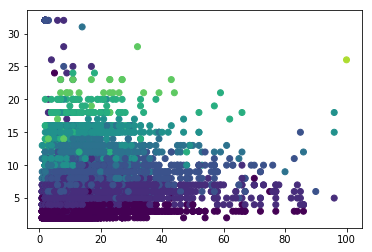

In [63]:
plt.scatter(X['area_percentage'], X['height_percentage'], c = X['count_floors_pre_eq'])

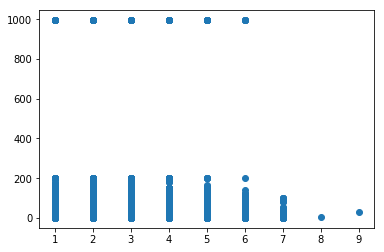

In [65]:
plt.scatter(X['count_floors_pre_eq'], X['age'])

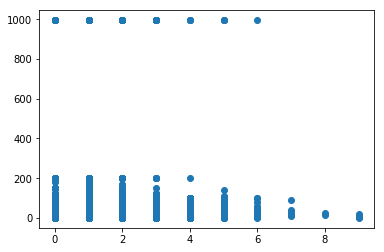

In [66]:
plt.scatter(X['count_families'], X['age'])

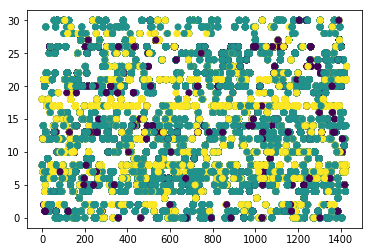

In [68]:
plt.scatter(X['geo_level_2_id'], X['geo_level_1_id'], c = X['damage_grade'])

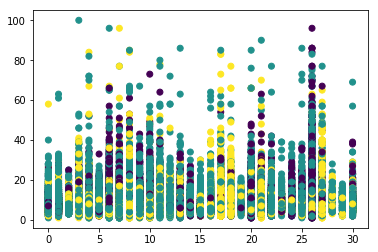

In [69]:
plt.scatter(X['geo_level_1_id'], X['area_percentage'], c = X['damage_grade'])

In [4]:
X.shape

(260601, 40)

In [5]:
y.drop(['building_id'], axis = 1, inplace = True)

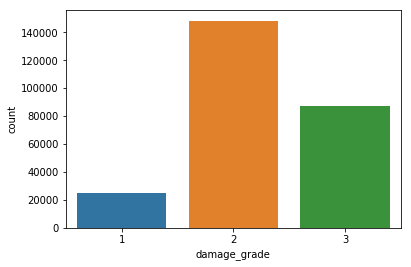

In [6]:
sns.countplot(y['damage_grade'])

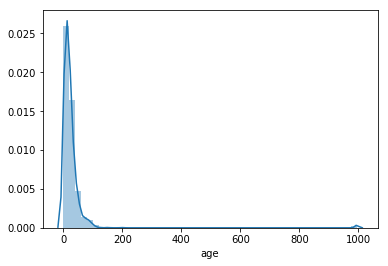

In [7]:
sns.distplot(X['age'])

In [8]:
unique = X['age'].unique()
unique[::-1].sort()
unique

array([995, 200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145,
       140, 135, 130, 125, 120, 115, 110, 105, 100,  95,  90,  85,  80,
        75,  70,  65,  60,  55,  50,  45,  40,  35,  30,  25,  20,  15,
        10,   5,   0])

In [9]:
age = X['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
# age = (new_age - np.mean(new_age)) / np.std(new_age)
X['age'] = new_age.T

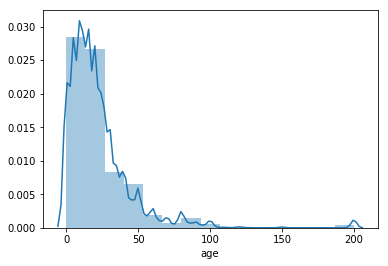

In [10]:
sns.distplot(X['age'], bins = 15, kde = True)

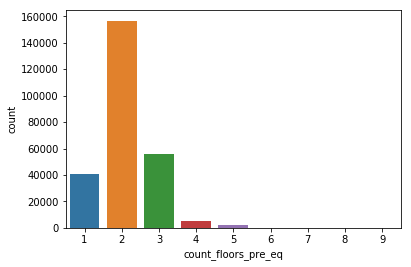

In [11]:
sns.countplot(X['count_floors_pre_eq'])

In [12]:
X['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

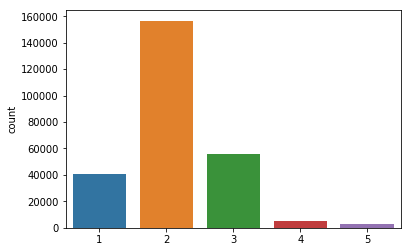

In [13]:
floors = X['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
sns.countplot(new_floors)

In [14]:
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X['count_floors_pre_eq'] = new_floors.T

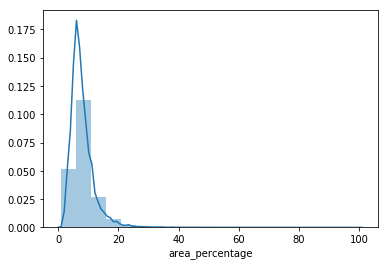

In [15]:
sns.distplot(X['area_percentage'], bins = 20)

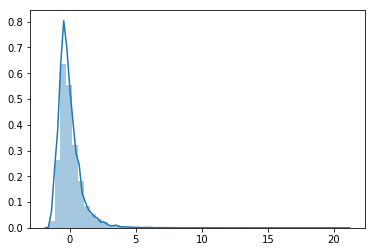

In [16]:
ap = X['area_percentage'].values
new_ap = (ap - np.mean(ap)) / np.std(ap)
sns.distplot(new_ap)

In [17]:
# ap = boxcox(ap)[0]
# sns.distplot(ap)

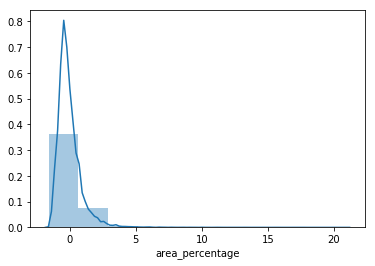

In [18]:
X.drop(['area_percentage'], axis = 1, inplace = True)
X['area_percentage'] = new_ap.T
sns.distplot(X['area_percentage'], bins = 10)

(array([3.5262e+04, 3.7763e+04, 7.8513e+04, 4.6477e+04, 3.5465e+04,
        1.9278e+04, 4.4920e+03, 9.1700e+02, 9.0700e+02, 7.5900e+02,
        3.5800e+02, 1.7900e+02, 9.0000e+00, 7.1000e+01, 7.0000e+00,
        4.6000e+01, 0.0000e+00, 1.1000e+01, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 7.6000e+01]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ,
        15.2, 16.4, 17.6, 18.8, 20. , 21.2, 22.4, 23.6, 24.8, 26. , 27.2,
        28.4, 29.6, 30.8, 32. ]),
 <a list of 25 Patch objects>)

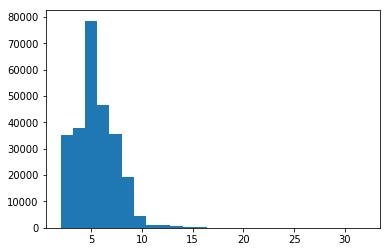

In [19]:
plt.hist(X['height_percentage'], bins = 25)

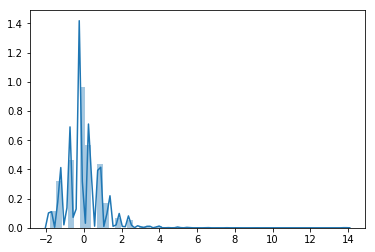

In [20]:
hp = X['height_percentage'].values
new_hp = (hp - np.mean(hp)) / np.std(hp)
sns.distplot(new_hp)

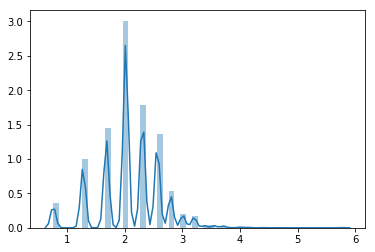

In [21]:
hp = boxcox(hp)[0]
sns.distplot(hp)

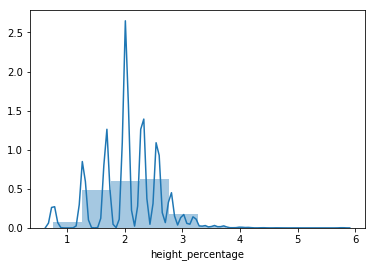

In [22]:
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T
sns.distplot(X['height_percentage'], bins = 10)

In [23]:
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,age,count_floors_pre_eq,area_percentage,height_percentage
0,802906,6,487,12198,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,30,2,-0.459460,2.020461
1,28830,8,900,2812,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,10,2,-0.004110,2.566995
2,94947,21,363,8973,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,10,2,-0.687135,2.020461
3,590882,22,418,10694,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,10,2,-0.459460,2.020461
4,201944,11,131,1488,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,30,3,-0.004110,3.009199


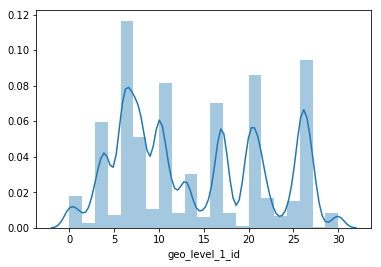

In [24]:
sns.distplot(X['geo_level_1_id'], bins = 21, kde = True)

In [25]:
val = 1 + 3.322 * np.log10(X.shape[0])

In [26]:
cuts = pd.cut(X['geo_level_1_id'], ceil(val) + 2)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T

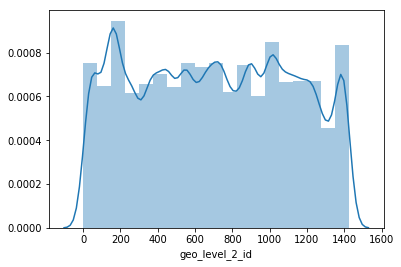

In [27]:
sns.distplot(X['geo_level_2_id'], bins = 19)

In [28]:
cuts = pd.cut(X['geo_level_2_id'], ceil(val) + 2)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

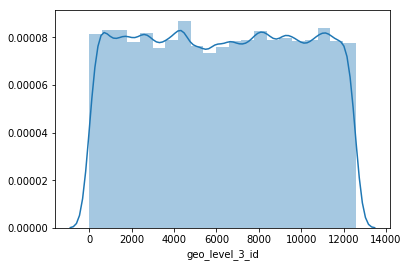

In [29]:
sns.distplot(X['geo_level_3_id'], bins = 21)

In [30]:
X.head()

,building_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,age,count_floors_pre_eq,area_percentage,height_percentage,geo_level_1_id,geo_level_2_id
0,802906,12198,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,30,2,-0.459460,2.020461,4,7
1,28830,2812,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,10,2,-0.004110,2.566995,5,13
2,94947,8973,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,10,2,-0.687135,2.020461,14,5
3,590882,10694,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,10,2,-0.459460,2.020461,15,6
4,201944,1488,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,30,3,-0.004110,3.009199,7,1


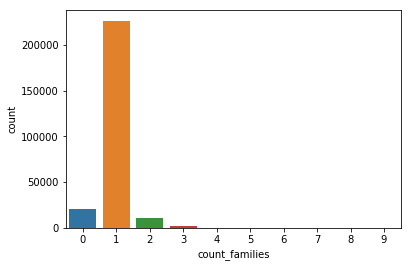

In [31]:
sns.countplot(X['count_families'])

In [32]:
X['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [33]:
cf = X['count_families'].values.tolist()
cf_new = [3 if x >= 3 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T

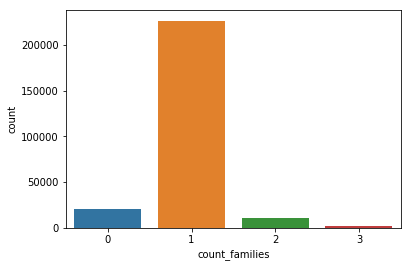

In [34]:
sns.countplot(X['count_families'])

In [35]:
category_cols = ['geo_level_1_id', 'geo_level_2_id','roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)

In [36]:
X.drop(['building_id', 'damage_grade', 'geo_level_3_id'], axis = 1, inplace = True)
X.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,age,count_floors_pre_eq,area_percentage,height_percentage,count_families,geo_level_1_id_0,geo_level_1_id_1,geo_level_1_id_2,geo_level_1_id_3,geo_level_1_id_4,geo_level_1_id_5,geo_level_1_id_6,geo_level_1_id_7,geo_level_1_id_8,geo_level_1_id_9,geo_level_1_id_10,geo_level_1_id_11,geo_level_1_id_12,geo_level_1_id_13,geo_level_1_id_14,geo_level_1_id_15,geo_level_1_id_16,geo_level_1_id_17,geo_level_1_id_18,geo_level_1_id_19,geo_level_1_id_20,geo_level_2_id_0,geo_level_2_id_1,...,geo_level_2_id_9,geo_level_2_id_10,geo_level_2_id_11,geo_level_2_id_12,geo_level_2_id_13,geo_level_2_id_14,geo_level_2_id_15,geo_level_2_id_16,geo_level_2_id_17,geo_level_2_id_18,geo_level_2_id_19,geo_level_2_id_20,roof_type_n,roof_type_q,roof_type_x,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,2,-0.459460,2.020461,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2,-0.004110,2.566995,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2,-0.687135,2.020461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2,-0.459460,2.020461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,3,-0.004110,3.009199,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [37]:
X.shape

(260601, 107)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20)

In [48]:
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)

In [49]:
# y_pred = xgb.predict(X_val)
# y_pred

In [50]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [51]:
y_train_cat = pd.get_dummies(y_train, columns = ['damage_grade'])
y_val_cat = pd.get_dummies(y_val, columns = ['damage_grade'])

In [52]:
y_train_cat.head()

,damage_grade_1,damage_grade_2,damage_grade_3
118573,0,1,0
180432,1,0,0
94674,0,1,0
116642,0,0,1
16045,0,0,1


In [53]:
model = Sequential()
model.add(Dense(128, input_shape = (X.shape[1],), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [f1_m])

In [54]:
model.fit(X_train, y_train_cat, batch_size = 96, epochs = 100, validation_data = (X_val, y_val_cat))

Train on 208480 samples, validate on 52121 samples
Epoch 1/100
208480/208480 [==============================] - 9s 41us/step - loss: 0.7302 - f1_m: 0.6441 - val_loss: 0.6997 - val_f1_m: 0.6610
Epoch 2/100
208480/208480 [==============================] - 8s 39us/step - loss: 0.6943 - f1_m: 0.6673 - val_loss: 0.6831 - val_f1_m: 0.6744
Epoch 3/100
208480/208480 [==============================] - 9s 42us/step - loss: 0.6788 - f1_m: 0.6780 - val_loss: 0.6787 - val_f1_m: 0.6781
Epoch 4/100
208480/208480 [==============================] - 8s 40us/step - loss: 0.6675 - f1_m: 0.6856 - val_loss: 0.6684 - val_f1_m: 0.6889
Epoch 5/100
208480/208480 [==============================] - 8s 40us/step - loss: 0.6590 - f1_m: 0.6908 - val_loss: 0.6629 - val_f1_m: 0.6898
Epoch 6/100
208480/208480 [==============================] - 9s 43us/step - loss: 0.6519 - f1_m: 0.6948 - val_loss: 0.6645 - val_f1_m: 0.6883
Epoch 7/100
208480/208480 [==============================] - 12s 57us/step - loss: 0.6450 - f1_m:

KeyboardInterrupt: 

In [ ]:
f1_score(y_val, y_pred, average = 'micro')

In [ ]:
X_test = pd.read_csv('test_values.csv')
building_id = X_test['building_id'].values.tolist()
X_test.head()

In [ ]:
age = X_test['age'].values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X_test.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X_test['age'] = age.T

In [ ]:
floors = X_test['count_floors_pre_eq'].values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X_test.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X_test['count_floors_pre_eq'] = floors.T

In [ ]:
ap = X_test['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X_test.drop(['area_percentage'], axis = 1, inplace = True)
X_test['area_percentage'] = ap.T

In [ ]:
hp = X_test['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X_test.drop(['height_percentage'], axis = 1, inplace = True)
X_test['height_percentage'] = hp.T

In [ ]:
cuts = pd.cut(X_test['geo_level_1_id'], 21)
X_test.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X_test['geo_level_1_id'] = cuts.T

In [ ]:
cuts = pd.cut(X_test['geo_level_2_id'], 23)
X_test.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X_test['geo_level_2_id'] = cuts.T

In [ ]:
temp = X_test['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X_test.drop(['geo_level_3_id'], axis = 1, inplace = True)
X_test['geo_level_3_id'] = temp.T

In [ ]:
cf = X_test['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X_test.drop(['count_families'], axis = 1, inplace = True)
X_test['count_families'] = np.array(cf_new).T

In [ ]:
category_cols = ['geo_level_1_id', 'geo_level_2_id', 'roof_type', 'foundation_type', 'land_surface_condition', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
X_test = pd.get_dummies(X_test, columns = category_cols)

In [ ]:
X_test.drop(['building_id'], axis = 1, inplace = True)
X_test.head()

In [ ]:
y_test = xgb.predict(X_test)

In [ ]:
df = pd.DataFrame()
df['building_id'] = np.array(building_id).T
df['damage_grade'] = np.array(y_test).T
df

In [ ]:
df.to_csv('solution.csv', index = False)